# Carregando os dados

In [20]:
import pandas as pd
df = pd.read_feather('credit_scoring.ftr')

In [21]:
df.shape

(750000, 15)

In [22]:
df.columns

Index(['data_ref', 'index', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda', 'mau'],
      dtype='object')

In [23]:
dataset = df.sample(40000)

In [24]:
dataset.drop(['data_ref','index'], axis=1, inplace=True)

In [25]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Conjunto de dados para modelagem (treino e teste): ' + str(data.shape))
print('Conjunto de dados não usados no treino/teste, apenas como validação: ' + str(data_unseen.shape))

Conjunto de dados para modelagem (treino e teste): (38000, 13)
Conjunto de dados não usados no treino/teste, apenas como validação: (2000, 13)


In [26]:
from pycaret.classification import *

# Alterando os dados de treino

In [27]:
data.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
mau                         bool
dtype: object

In [28]:
#forçando a variável qnt de filhos como numérica
data.qtd_filhos = data.qtd_filhos.astype(float)

In [29]:
data.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
qtd_filhos,1.000000,-0.370973,-0.072688,0.892521,-0.039339,0.001245
idade,-0.370973,1.000000,0.324849,-0.341211,0.100911,-0.031023
tempo_emprego,-0.072688,0.324849,1.000000,-0.064811,0.496887,-0.137465
qt_pessoas_residencia,0.892521,-0.341211,-0.064811,1.000000,-0.046482,-0.004022
renda,-0.039339,0.100911,0.496887,-0.046482,1.000000,-0.067622
mau,0.001245,-0.031023,-0.137465,-0.004022,-0.067622,1.000000


In [30]:
data.mau.value_counts(normalize=True)

False    0.924132
True     0.075868
Name: mau, dtype: float64

In [31]:
exp_aula4 = setup(data = data, target = 'mau', experiment_name='credit_1',
                  normalize=True, normalize_method='zscore', 
                  transformation=True, transformation_method = 'quantile',
                  fix_imbalance=True)



,Description,Value
0,session_id,2373
1,Target,mau
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(38000, 13)"
5,Missing Values,True
6,Numeric Features,5
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [32]:
best_model = compare_models(fold=4, sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7091,0.7807,0.7088,0.1657,0.2686,0.1669,0.2361,2.9750
lda,Linear Discriminant Analysis,0.7045,0.7805,0.7163,0.1645,0.2675,0.1654,0.2361,0.2500
gbc,Gradient Boosting Classifier,0.7904,0.7656,0.5400,0.1888,0.2797,0.1893,0.2253,3.2000
ada,Ada Boost Classifier,0.7122,0.7624,0.6778,0.1622,0.2617,0.1597,0.2232,1.5075
lightgbm,Light Gradient Boosting Machine,0.8684,0.7518,0.3222,0.2313,0.2692,0.1990,0.2024,0.5250
rf,Random Forest Classifier,0.8660,0.7101,0.2028,0.1712,0.1854,0.1131,0.1136,1.9400
nb,Naive Bayes,0.3637,0.6868,0.8111,0.0906,0.1626,0.0316,0.0781,0.0900
et,Extra Trees Classifier,0.8641,0.6593,0.1958,0.1637,0.1781,0.1048,0.1053,2.2175
knn,K Neighbors Classifier,0.7722,0.6409,0.3936,0.1400,0.2064,0.1074,0.1270,4.2775
dt,Decision Tree Classifier,0.8233,0.5787,0.2907,0.1509,0.1986,0.1104,0.1179,0.2000


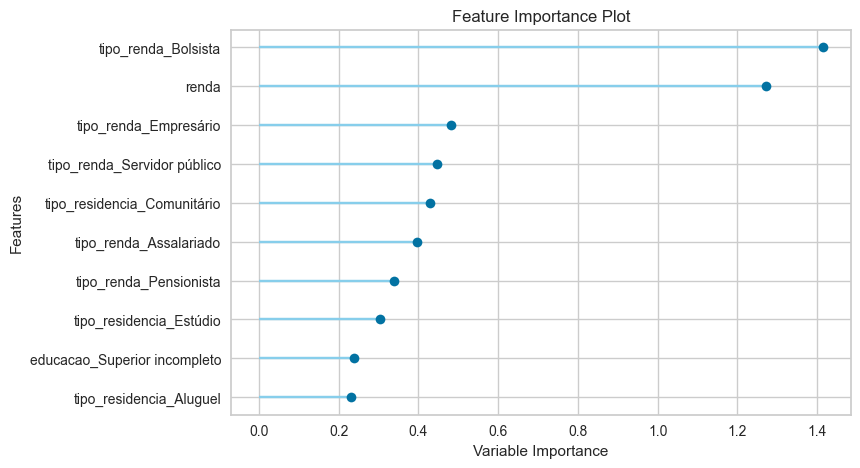

In [33]:
plot_model(best_model, plot='feature')

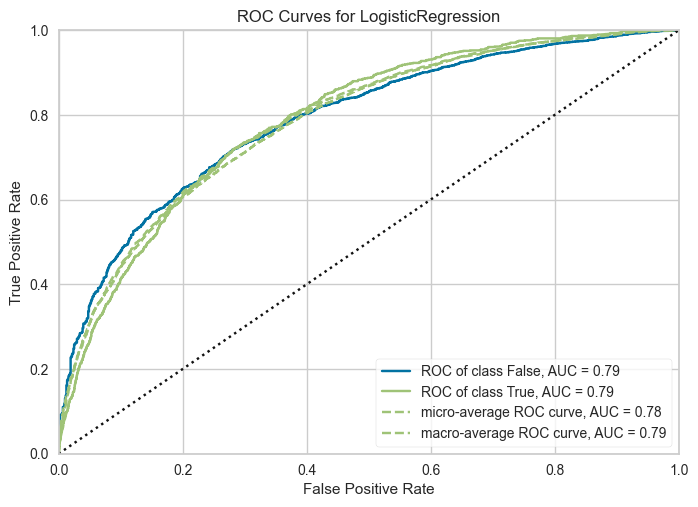

In [34]:
plot_model(best_model, plot='auc')

In [35]:
save_model(best_model,'model_final')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='mau',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=1.0, class_weight=None, dual=False,
                 

In [36]:
model_saved = load_model('model_final')

Transformation Pipeline and Model Successfully Loaded


In [37]:
model_saved.named_steps

{'dtypes': DataTypes_Auto_infer(categorical_features=[], display_types=True,
                      features_todrop=[], id_columns=[],
                      ml_usecase='classification', numerical_features=[],
                      target='mau', time_features=[]),
 'imputer': Simple_Imputer(categorical_strategy='not_available',
                fill_value_categorical=None, fill_value_numerical=None,
                numeric_strategy='mean', target_variable=None),
 'new_levels1': New_Catagorical_Levels_in_TestData(replacement_strategy='least frequent',
                                    target='mau'),
 'ordinal': 'passthrough',
 'cardinality': 'passthrough',
 'znz': 'passthrough',
 'club_R_L': 'passthrough',
 'new_levels': New_Catagorical_Levels_in_TestData(replacement_strategy='least frequent',
                                    target='mau'),
 'feature_time': Make_Time_Features(list_of_features=None,
                    time_feature=Index([], dtype='object')),
 'group': 'passthrough',
 

In [38]:
exp_aula4 = setup(data = data, target = 'mau',
                  normalize = True, 
                  transformation = True, 
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                  bin_numeric_features = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia'])

,Description,Value
0,session_id,479
1,Target,mau
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(38000, 13)"
5,Missing Values,True
6,Numeric Features,5
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False
